In [1]:
import pandas as pd

# Load the Titanic datasets
train_data_path = "D:\Excelr\Data Science\Data Science Assignment\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv"
test_data_path = "D:\Excelr\Data Science\Data Science Assignment\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv"

titanic_train = pd.read_csv(train_data_path)
titanic_test = pd.read_csv(test_data_path)
# missing values in the train dataset
missing_values_train = titanic_train.isnull().sum()
# missing values in the test dataset
missing_values_test = titanic_test.isnull().sum()

missing_values_train, missing_values_test

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

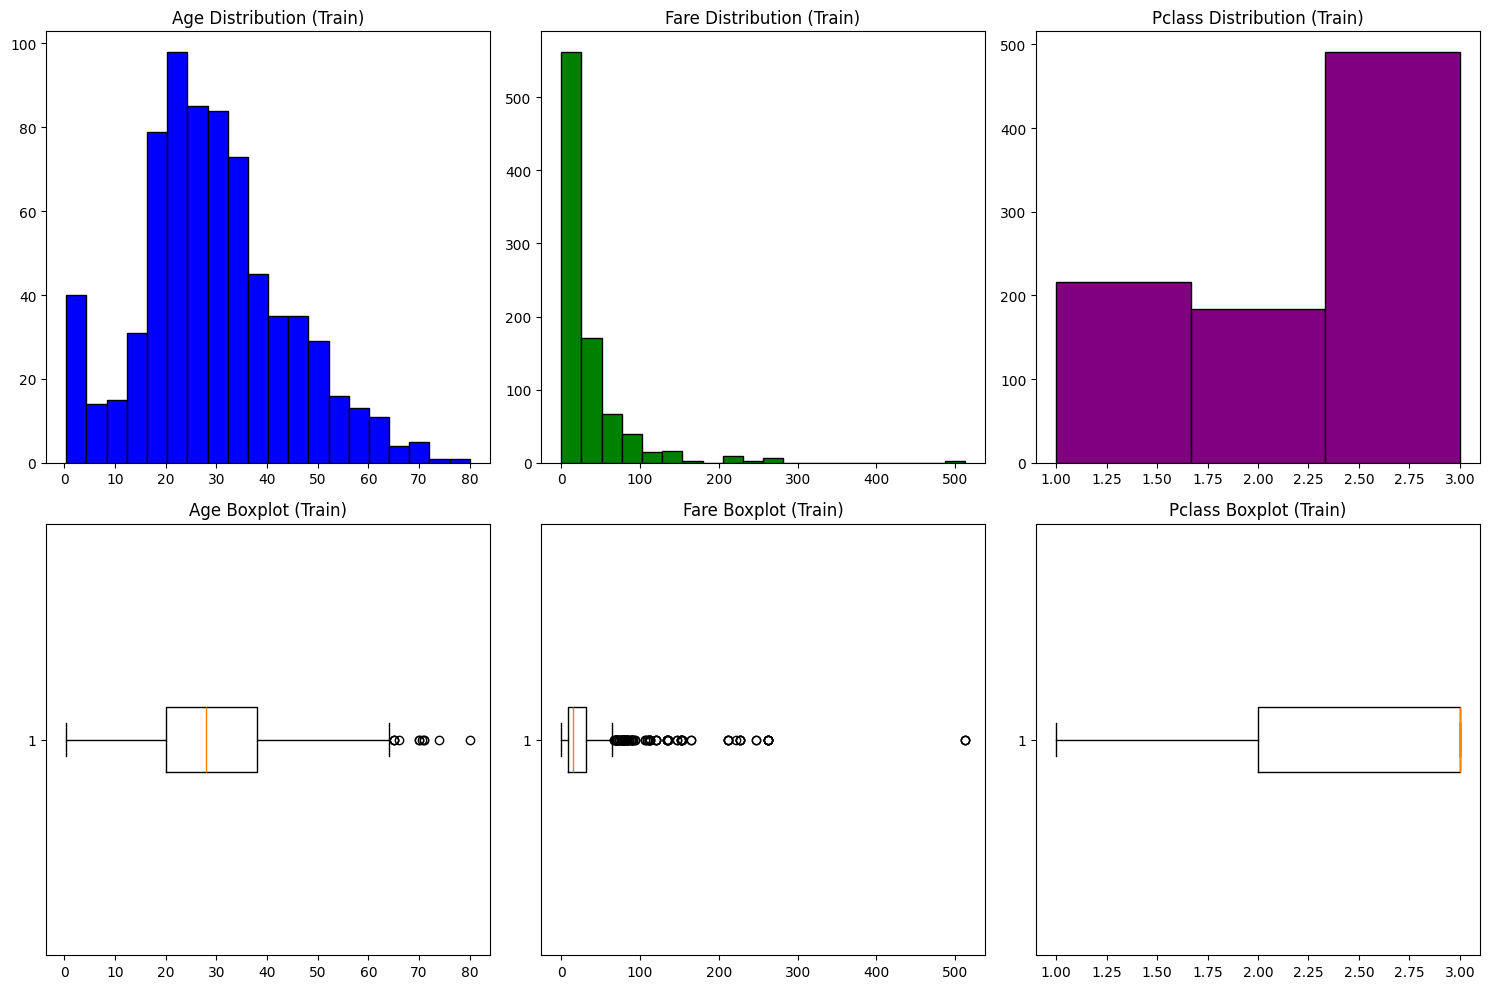

In [2]:
import matplotlib.pyplot as plt

# Plot histograms and box plots for Age, Fare, and Pclass in the training dataset
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# Age
axes[0, 0].hist(titanic_train['Age'].dropna(), bins=20, color='blue', edgecolor='black')
axes[0, 0].set_title('Age Distribution (Train)')
# Fare
axes[0, 1].hist(titanic_train['Fare'], bins=20, color='green', edgecolor='black')
axes[0, 1].set_title('Fare Distribution (Train)')
# Pclass
axes[0, 2].hist(titanic_train['Pclass'], bins=3, color='purple', edgecolor='black')
axes[0, 2].set_title('Pclass Distribution (Train)')
# Boxplots for Age, Fare, and Pclass
axes[1, 0].boxplot(titanic_train['Age'].dropna(), vert=False)
axes[1, 0].set_title('Age Boxplot (Train)')

axes[1, 1].boxplot(titanic_train['Fare'], vert=False)
axes[1, 1].set_title('Fare Boxplot (Train)')

axes[1, 2].boxplot(titanic_train['Pclass'], vert=False)
axes[1, 2].set_title('Pclass Boxplot (Train)')

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10624\2322004219.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic_train, x='Pclass', y='Survived', palette='coolwarm')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10624\2322004219.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic_train, x='Sex', y='Survived', palette='coolwarm')


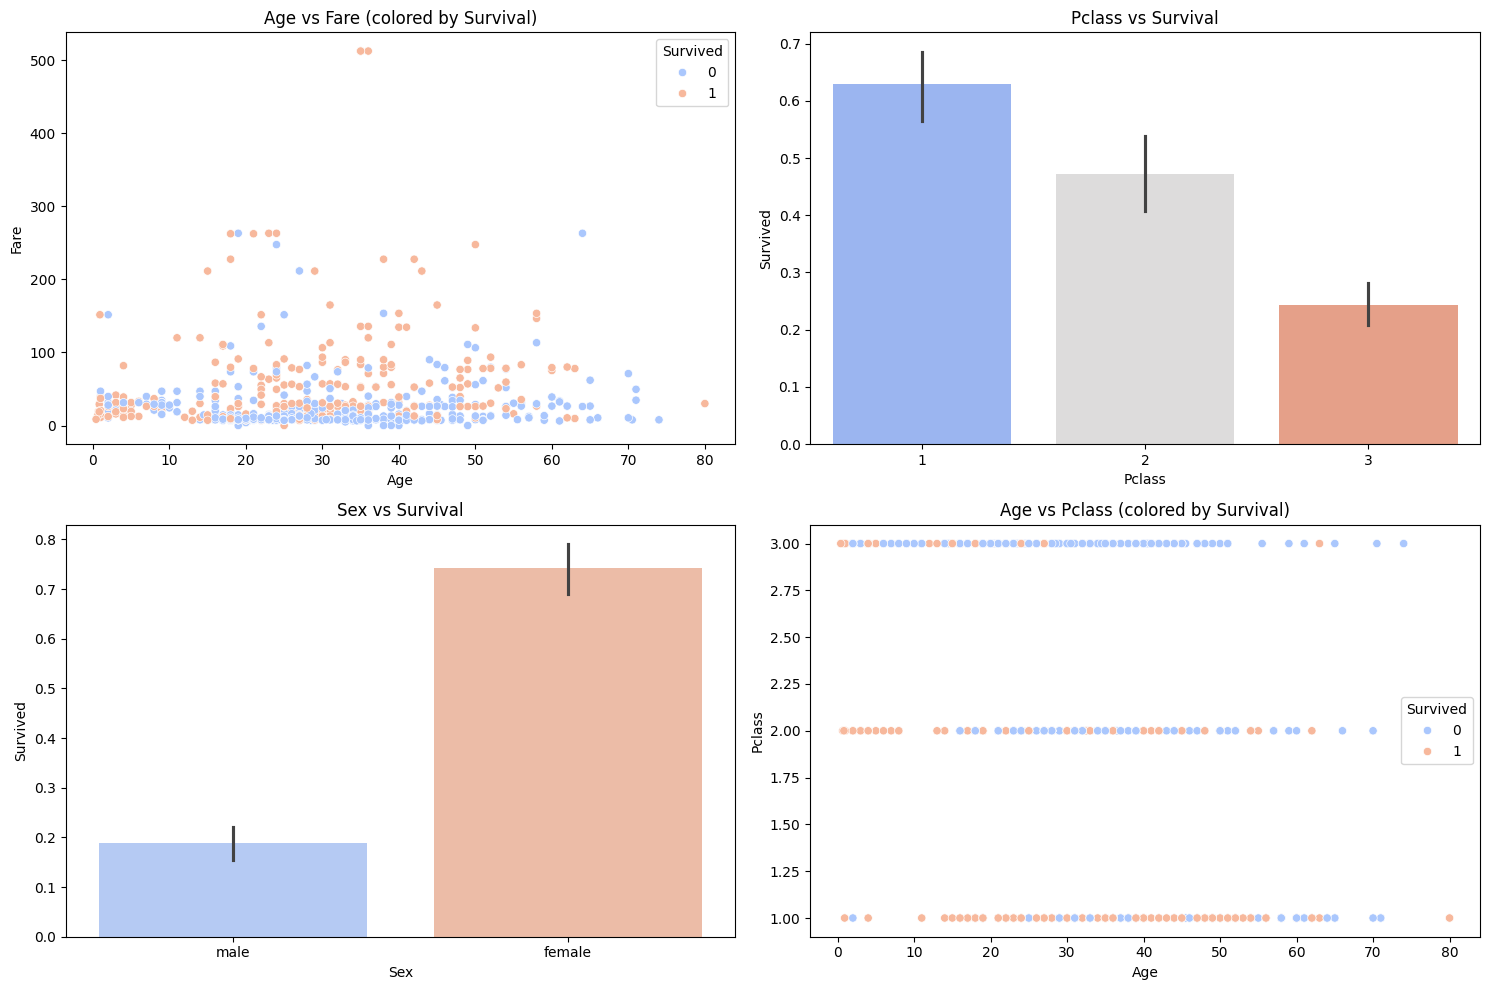

In [3]:
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 10))
# Scatter plot: Age vs Fare colored by survival
plt.subplot(2, 2, 1)
sns.scatterplot(data=titanic_train, x='Age', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Age vs Fare (colored by Survival)')
# Bar plot: Pclass vs Survival
plt.subplot(2, 2, 2)
sns.barplot(data=titanic_train, x='Pclass', y='Survived', palette='coolwarm')
plt.title('Pclass vs Survival')
# Bar plot: Sex vs Survival
plt.subplot(2, 2, 3)
sns.barplot(data=titanic_train, x='Sex', y='Survived', palette='coolwarm')
plt.title('Sex vs Survival')
# Scatter plot: Age vs Pclass colored by survival
plt.subplot(2, 2, 4)
sns.scatterplot(data=titanic_train, x='Age', y='Pclass', hue='Survived', palette='coolwarm')
plt.title('Age vs Pclass (colored by Survival)')

plt.tight_layout()
plt.show()

In [4]:
# Impute Age with the median value
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)
# Impute Embarked with the most frequent value in the train dataset
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)
titanic_test['Fare'].fillna(titanic_test['Fare'].median(), inplace=True)  # Impute Fare in test dataset
# Create a new feature 'HasCabin' to indicate whether a passenger had a Cabin or not
titanic_train['HasCabin'] = titanic_train['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
titanic_test['HasCabin'] = titanic_test['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
# Drop the 'Cabin', 'PassengerId', 'Name', and 'Ticket' columns (non-informative)
titanic_train.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)
titanic_test.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)
# One-hot encode categorical variables (Sex and Embarked)
titanic_train = pd.get_dummies(titanic_train, columns=['Sex', 'Embarked'], drop_first=True)
titanic_test = pd.get_dummies(titanic_test, columns=['Sex', 'Embarked'], drop_first=True)
# Verify the changes after preprocessing
titanic_train.head(), titanic_test.head()

(   Survived  Pclass   Age  SibSp  Parch     Fare  HasCabin  Sex_male  \
 0         0       3  22.0      1      0   7.2500         0         1   
 1         1       1  38.0      1      0  71.2833         1         0   
 2         1       3  26.0      0      0   7.9250         0         0   
 3         1       1  35.0      1      0  53.1000         1         0   
 4         0       3  35.0      0      0   8.0500         0         1   
 
    Embarked_Q  Embarked_S  
 0           0           1  
 1           0           0  
 2           0           1  
 3           0           1  
 4           0           1  ,
    Pclass   Age  SibSp  Parch     Fare  HasCabin  Sex_male  Embarked_Q  \
 0       3  34.5      0      0   7.8292         0         1           1   
 1       3  47.0      1      0   7.0000         0         0           0   
 2       2  62.0      0      0   9.6875         0         1           1   
 3       3  27.0      0      0   8.6625         0         1           0   
 4       3

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb
import xgboost as xgb

# Define features and target variable
X_train = titanic_train.drop(columns=['Survived'])
y_train = titanic_train['Survived']

X_test = titanic_test

# 2. Model building and evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return {'Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1-Score': f1}
results = {}
# 3. LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
# Predict using LightGBM on the test set
lgb_preds = lgb_model.predict(X_test)
# 4. XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
# Predict using XGBoost on the test set
xgb_preds = xgb_model.predict(X_test)
# Show the models' predictions
lgb_preds[:5], xgb_preds[:5]

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:20:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(array([0, 0, 0, 1, 0], dtype=int64), array([0, 0, 0, 0, 1]))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
# Split the training dataset into a training and validation set
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Train LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_split, y_train_split)
lgb_val_preds = lgb_model.predict(X_val_split)
# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_split, y_train_split)
xgb_val_preds = xgb_model.predict(X_val_split)
# Function to evaluate model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return {'Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1-Score': f1}
# Evaluate both models
lgb_metrics = evaluate_model(y_val_split, lgb_val_preds)
xgb_metrics = evaluate_model(y_val_split, xgb_val_preds)

print("LightGBM Performance: ", lgb_metrics)
print("XGBoost Performance: ", xgb_metrics)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:22:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


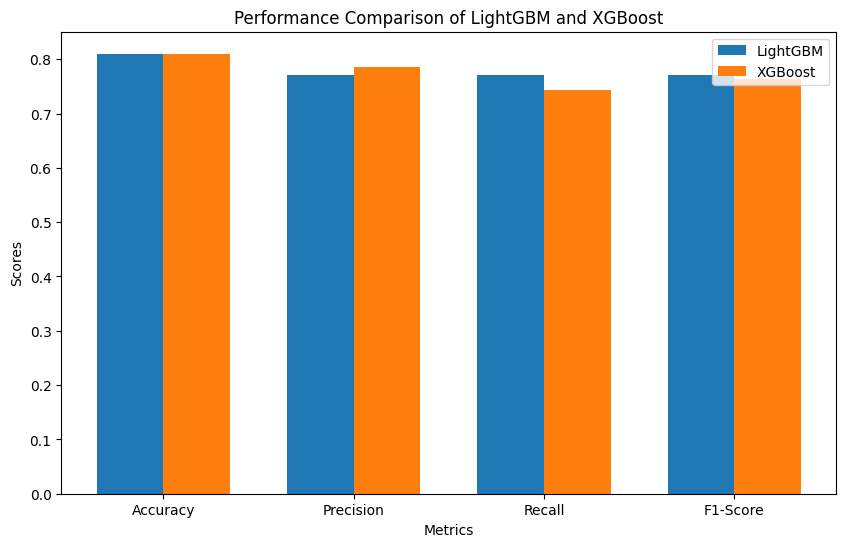

In [7]:
import matplotlib.pyplot as plt

# Sample data for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lgb_values = [lgb_metrics[metric] for metric in metrics]
xgb_values = [xgb_metrics[metric] for metric in metrics]
# Bar plot for performance comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics))

plt.bar(index, lgb_values, bar_width, label='LightGBM')
plt.bar([i + bar_width for i in index], xgb_values, bar_width, label='XGBoost')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Comparison of LightGBM and XGBoost')
plt.xticks([i + bar_width / 2 for i in index], metrics)
plt.legend()

plt.show()

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:24:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


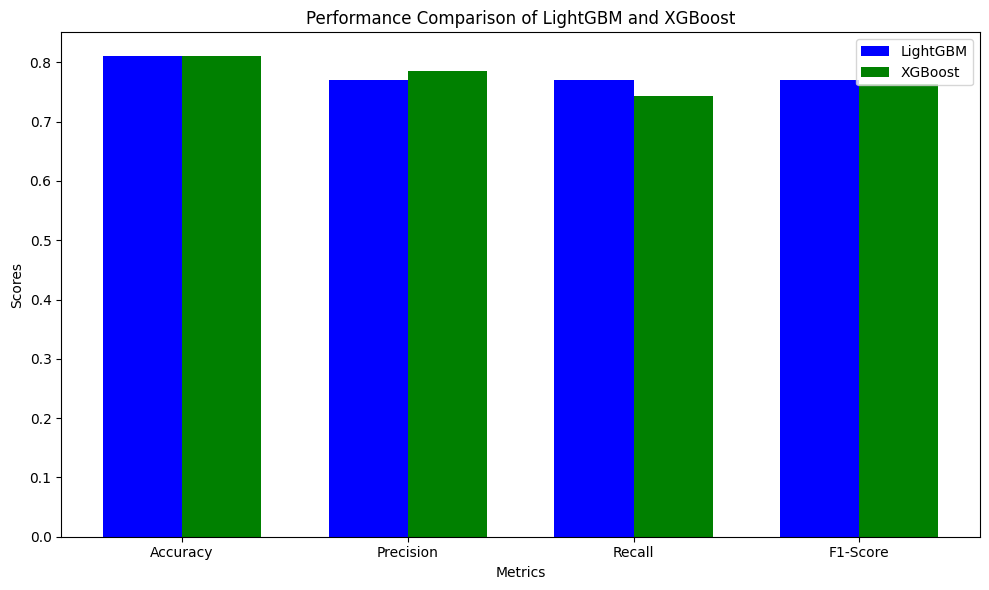

In [8]:
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

X_train = titanic_train.drop(columns=['Survived'])
y_train = titanic_train['Survived']

# Split the training dataset into a training and validation set
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Step 2: Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_split, y_train_split)
# Predict on the validation set
lgb_val_preds = lgb_model.predict(X_val_split)
# Step 3: Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_split, y_train_split)
# Predict on the validation set
xgb_val_preds = xgb_model.predict(X_val_split)
# Step 4: Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return {'Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1-Score': f1}
# Step 5: Evaluate both models
lgb_metrics = evaluate_model(y_val_split, lgb_val_preds)
xgb_metrics = evaluate_model(y_val_split, xgb_val_preds)
# Print performance metrics
print("LightGBM Performance: ", lgb_metrics)
print("XGBoost Performance: ", xgb_metrics)
# Step 6: Visualize the comparison of performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lgb_values = [lgb_metrics[metric] for metric in metrics]
xgb_values = [xgb_metrics[metric] for metric in metrics]
# Bar plot for performance comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics))

plt.bar(index, lgb_values, bar_width, label='LightGBM', color='blue')
plt.bar([i + bar_width for i in index], xgb_values, bar_width, label='XGBoost', color='green')

# Set titles and labels
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Comparison of LightGBM and XGBoost')
plt.xticks([i + bar_width / 2 for i in index], metrics)
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()